In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('iris.txt', delim_whitespace=True)
data_head = pd.read_csv('iris_head.txt', delim_whitespace=True)
data_tail = pd.read_csv('iris_tail.txt', delim_whitespace=True)

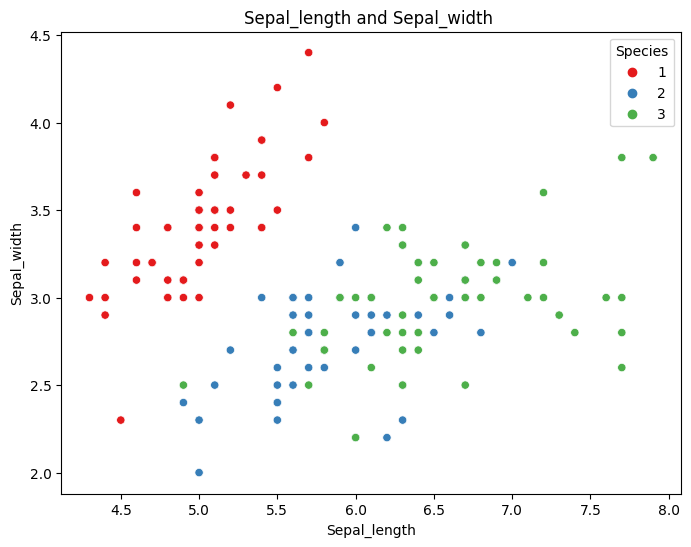

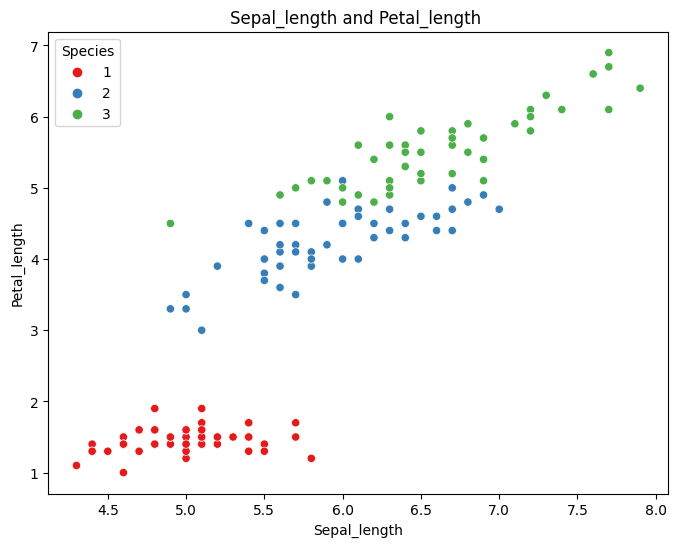

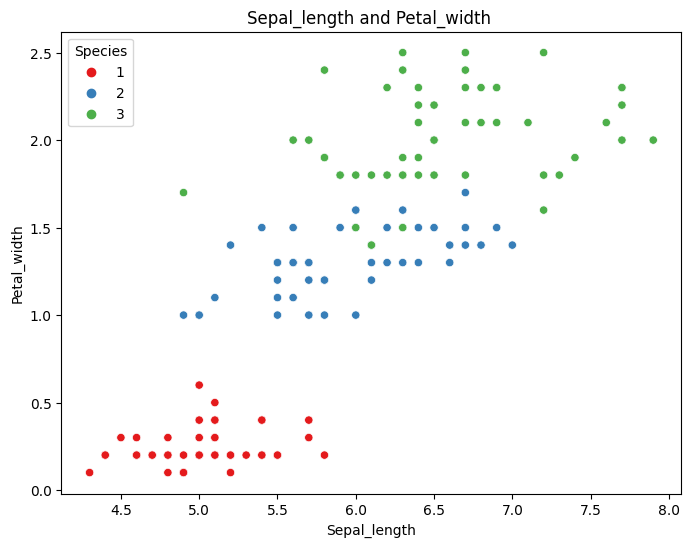

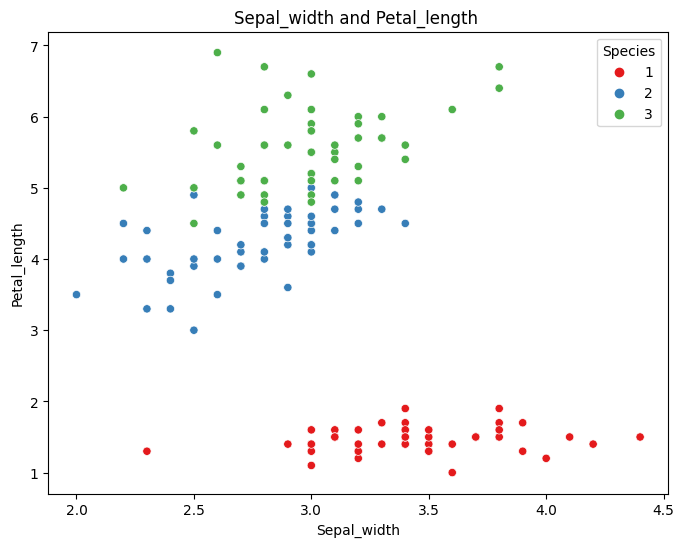

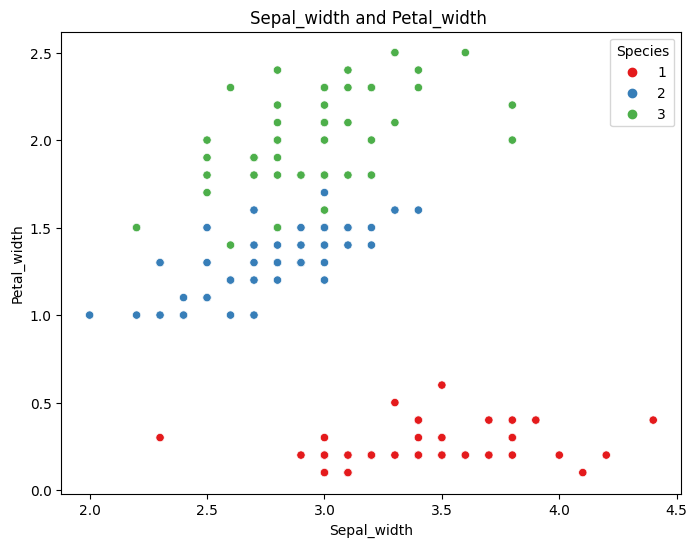

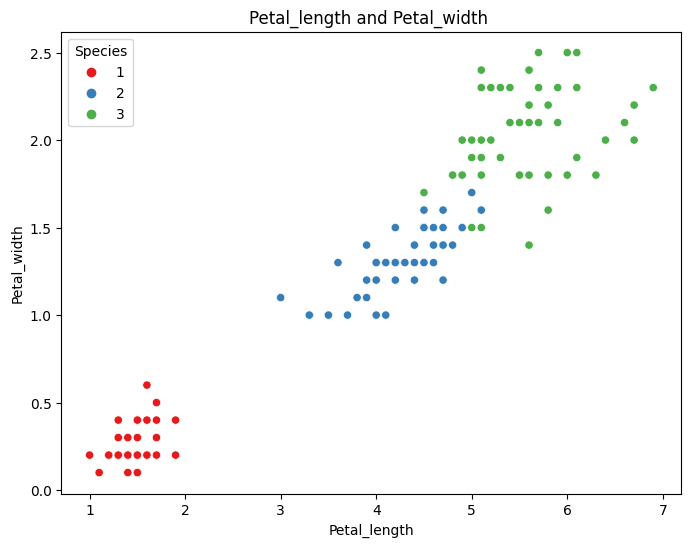

In [28]:
def plot_scatter(data, feature1, feature2):
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=feature1, y=feature2, hue="species", palette="Set1")
    plt.title(f"{feature1} and {feature2} ")
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend(title="Species")
    plt.show()

plot_scatter(data, "Sepal_length", "Sepal_width")
plot_scatter(data, "Sepal_length", "Petal_length")
plot_scatter(data, "Sepal_length", "Petal_width")
plot_scatter(data, "Sepal_width", "Petal_length")
plot_scatter(data, "Sepal_width", "Petal_width")
plot_scatter(data, "Petal_length", "Petal_width")

In [29]:
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common


In [62]:
#選擇要刪除掉哪些行
columns_to_drop = ["species"]

x_head = data_head.drop(columns_to_drop, axis=1).values
y_head = data_head['species'].values

x_tail = data_tail.drop(columns_to_drop, axis=1).values
y_tail = data_tail['species'].values

knn_model_head = KNN(k=3)
knn_model_head.fit(x_head, y_head)

knn_model_tail = KNN(k=3)
knn_model_tail.fit(x_tail, y_tail)

head_pred = knn_model_tail.predict(x_head)
tail_pred = knn_model_head.predict(x_tail)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_head, head_pred)
print("rate:", accuracy)
accuracy_2 = accuracy_score(y_tail, tail_pred)
print("rate:", accuracy_2)

print("分類率: ",(accuracy+accuracy_2)/2)

rate: 0.96
rate: 0.92
分類率:  0.94


rate: 0.9466666666666667
rate: 0.9466666666666667
分類率:  0.9466666666666667
